In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Create Dataset

In [3]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, random_state=15, n_informative=3)

## Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Model Training

In [5]:
model = LogisticRegression()

In [6]:
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
model.coef_

array([[-0.79959991,  0.67539269, -0.0215561 , -0.07753479, -0.07862922,
        -0.02965438, -0.08510951,  0.94507543,  0.63468015,  0.29431232],
       [ 0.82242519, -0.29088316,  0.11672029,  0.08015409, -0.01306566,
         0.04596418,  0.15883266,  0.26908399, -0.20789881,  0.0660097 ],
       [-0.02282528, -0.38450953, -0.09516419, -0.0026193 ,  0.09169488,
        -0.01630981, -0.07372315, -1.21415942, -0.42678134, -0.36032203]])

## Prediction

In [8]:
y_pred = model.predict(X_test)

In [9]:
# model.predict_proba(X_test)

## Evaluation

In [10]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7833333333333333


In [11]:
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
matrix

array([[85,  9,  8],
       [ 3, 76, 23],
       [10, 12, 74]])

In [12]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       102
           1       0.78      0.75      0.76       102
           2       0.70      0.77      0.74        96

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



<Axes: >

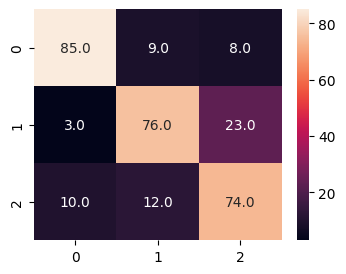

In [13]:
plt.figure(figsize=(4,3))
sns.heatmap(matrix, annot=True, fmt='0.1f')

<Axes: >

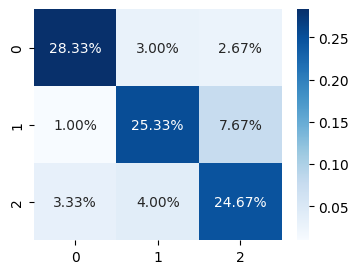

In [14]:
plt.figure(figsize=(4,3))
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

## HyperParameter Tuning and Cross Validation

In [15]:
model = LogisticRegression()

In [16]:
penalty = ['l1', 'l2', 'elasticnet']
C = [100, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

In [17]:
params = dict(penalty=penalty,C=C, solver=solver)

### Grid Search CV

In [18]:
cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [19]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [20]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [21]:
grid.best_score_

np.float64(0.8042857142857143)

In [22]:
y_pred = grid.predict(X_test)

In [23]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7733333333333333


In [24]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       102
           1       0.75      0.73      0.74       102
           2       0.70      0.77      0.74        96

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



<Axes: >

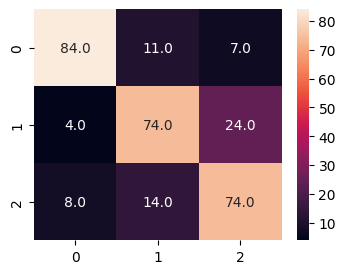

In [25]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(matrix, annot=True, fmt='0.1f')

### Randomized SearchCV

In [26]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
C = [100, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
params = dict(penalty=penalty,C=C, solver=solver)

random_cv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy')

In [27]:
random_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [28]:
random_cv.best_score_

np.float64(0.8028571428571428)

In [29]:
random_cv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}

In [30]:
y_pred = random_cv.predict(X_test)

In [31]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7766666666666666


In [32]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.77      0.71      0.73       102
           2       0.70      0.81      0.75        96

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



<Axes: >

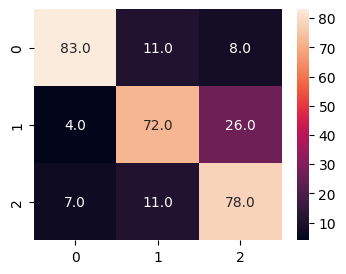

In [33]:
plt.figure(figsize=(4,3))
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(matrix, annot=True, fmt='0.1f')